In [1]:
!gdown 1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D

Downloading...
From: https://drive.google.com/uc?id=1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D
To: /content/used_cars.csv
100% 608k/608k [00:00<00:00, 32.5MB/s]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
len(df)

4009

In [5]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [7]:
# Xóa cột 'clean_title'
df.drop('clean_title', axis=1, inplace=True)

# Thay giá trị thiếu trong 'fuel_type' bằng mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

# Thay giá trị thiếu trong 'accident' bằng 'None reported'
df['accident'].fillna('None reported', inplace=True)

df.head()

<ipython-input-7-4ac6cd262041>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
<ipython-input-7-4ac6cd262041>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,"$34,999"


In [8]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [9]:
df.loc[0, 'price']

'$10,300'

In [10]:
# Chuyển đổi cột 'price' về int
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(int)

In [11]:
df['price']

,price
0,10300
1,38005
2,54598
3,15500
4,34999
...,...
4004,349950
4005,53900
4006,90998
4007,62999


In [12]:
df['car_age'] = df['model_year'].apply(lambda x: 2025 - x)
df.drop('model_year', axis=1, inplace=True)
df['car_age']

,car_age
0,12
1,4
2,3
3,10
4,4
...,...
4004,2
4005,3
4006,3
4007,5


In [13]:
df.loc[0, 'milage']

'51,000 mi.'

In [14]:
df['milage'] = df['milage'].str.replace('[\, mi.]', '', regex=True).astype(int)
df['milage']

,milage
0,51000
1,34742
2,22372
3,88900
4,9835
...,...
4004,714
4005,10900
4006,2116
4007,33000


In [16]:
df.loc[0, 'engine']

'300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'

In [17]:
df['engine'] = df['engine'].str.extract(r'(\d+\.\d+)L')
df['engine'] = df['engine'].astype(float)
df['engine']

,engine
0,3.7
1,3.8
2,NaN
3,3.5
4,2.0
...,...
4004,6.0
4005,3.0
4006,NaN
4007,3.5


In [18]:
df = df.dropna()

In [19]:
# Liệt kê các cột phân loại cần xử lý
categorical_columns = ['brand', 'model', 'transmission', 'int_col', 'ext_col', 'fuel_type']

# In ra các giá trị duy nhất của từng cột
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("-" * 40)

Unique values in brand:
['Ford' 'Hyundai' 'INFINITI' 'Audi' 'BMW' 'Lexus' 'Aston' 'Toyota'
 'Lincoln' 'Land' 'Mercedes-Benz' 'Dodge' 'Nissan' 'Jaguar' 'Genesis'
 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'MINI' 'Porsche' 'Honda' 'Hummer'
 'Chrysler' 'Acura' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion' 'Mitsubishi'
 'Mazda' 'Saturn' 'Bugatti' 'Rolls-Royce' 'McLaren' 'Buick' 'Lotus'
 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury' 'Plymouth' 'smart' 'Maybach'
 'Suzuki']
----------------------------------------
Unique values in model:
['Utility Police Interceptor Base' 'Palisade SEL' 'Q50 Hybrid Sport' ...
 'CT 200h Base' 'Martin DB7 Vantage Volante' 'Impala 2LZ']
----------------------------------------
Unique values in transmission:
['6-Speed A/T' '8-Speed Automatic' '7-Speed A/T' 'A/T' '8-Speed A/T'
 'Transmission w/Dual Shift Mode' '9-Speed Automatic' '6-Speed M/T'
 'Automatic' '10-Speed A/T' '9-Speed A/T' '5-Speed A/T' 'Automatic CVT'
 '7

In [20]:
# Tạo dictionary ánh xạ giá trị phân loại thành số
mappings = {column: {value: idx for idx, value in enumerate(df[column].unique())} for column in categorical_columns}

# In ra ánh xạ của từng cột
for column in categorical_columns:
    print(f"Mapping for {column}:")
    print(mappings[column])
    print("-" * 40)

Mapping for brand:
{'Ford': 0, 'Hyundai': 1, 'INFINITI': 2, 'Audi': 3, 'BMW': 4, 'Lexus': 5, 'Aston': 6, 'Toyota': 7, 'Lincoln': 8, 'Land': 9, 'Mercedes-Benz': 10, 'Dodge': 11, 'Nissan': 12, 'Jaguar': 13, 'Genesis': 14, 'Chevrolet': 15, 'Kia': 16, 'Jeep': 17, 'Bentley': 18, 'MINI': 19, 'Porsche': 20, 'Honda': 21, 'Hummer': 22, 'Chrysler': 23, 'Acura': 24, 'Volvo': 25, 'Cadillac': 26, 'Lamborghini': 27, 'Maserati': 28, 'Volkswagen': 29, 'Subaru': 30, 'GMC': 31, 'RAM': 32, 'Alfa': 33, 'Ferrari': 34, 'Scion': 35, 'Mitsubishi': 36, 'Mazda': 37, 'Saturn': 38, 'Bugatti': 39, 'Rolls-Royce': 40, 'McLaren': 41, 'Buick': 42, 'Lotus': 43, 'Pontiac': 44, 'FIAT': 45, 'Karma': 46, 'Saab': 47, 'Mercury': 48, 'Plymouth': 49, 'smart': 50, 'Maybach': 51, 'Suzuki': 52}
----------------------------------------
Mapping for model:
{'Utility Police Interceptor Base': 0, 'Palisade SEL': 1, 'Q50 Hybrid Sport': 2, 'Q3 45 S line Premium Plus': 3, 'S3 2.0T Premium Plus': 4, '740 iL': 5, 'RC 350 F Sport': 6, 'Mart

In [21]:
# Thay thế các giá trị phân loại trong các cột bằng các số ánh xạ
for column in categorical_columns:
    df[column] = df[column].map(mappings[column])

df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,car_age
0,0,0,51000,0,3.7,0,0,0,At least 1 accident or damage reported,10300,12
1,1,1,34742,1,3.8,1,1,1,At least 1 accident or damage reported,38005,4
3,2,2,88900,2,3.5,2,0,0,None reported,15500,10
4,3,3,9835,1,2.0,1,2,0,None reported,34999,4
6,3,4,84000,1,2.0,0,3,0,None reported,31000,8


In [22]:
df.drop('accident', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,price,car_age
0,0,0,51000,0,3.7,0,0,0,10300,12
1,1,1,34742,1,3.8,1,1,1,38005,4
2,2,2,88900,2,3.5,2,0,0,15500,10
3,3,3,9835,1,2.0,1,2,0,34999,4
4,3,4,84000,1,2.0,0,3,0,31000,8


==================================================================

In [23]:
# Tách đặc trưng và nhãn
X = df.drop('price', axis=1)
y = df['price']

# Chia thành tập train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("🧪 X_train:")
print(X_train)
print("\n🧪 y_train:")
print(y_train)
print("\n🧾 X_test:")
print(X_test)
print("\n🧾 y_test:")
print(y_test)

🧪 X_train:
      brand  model  milage  fuel_type  engine  transmission  ext_col  int_col  \
2245      0   1285   28724          1     1.6             7        8        0   
2861     16   1495   74000          1     2.4             0        7        0   
3181     11   1594   98231          1     6.1            11        3        0   
2401     38    367  134000          1     2.0            25        3        0   
2500     20   1371   47885          1     3.4             7        8        0   
...     ...    ...     ...        ...     ...           ...      ...      ...   
1130      7    808   98000          1     4.0             3        0        0   
1294      9    885   92080          1     2.0             0        8        0   
860       4    109   61145          1     4.4             2        7        6   
3507      0    533   85000          1     3.5             0        7        0   
3174      0   1498   39105          1     3.0            16        0        5   

      car_age  


In [25]:
trainExample = list(zip(X_train.values, y_train.values))

In [27]:
# Linear Regression implementation

def phi(x):
    return np.append(x, 1)

def initialWeightVector():
    dim = len(trainExample[0][0]) + 1
    return np.zeros(dim)

def trainloss(w):
    return (1.0 / len(trainExample)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in trainExample)

def gradientTrainloss(w):
    return (1.0 / len(trainExample)) * sum(2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in trainExample)

def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_iters=1000, step=50,
                    patience=20, tol=1e-5):
    w = initialWeightVector()
    history = []  # Store loss for plotting
    best_loss = float('inf')
    no_improve_count = 0

    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)

        # Check early stopping condition
        if best_loss - value > tol:
            best_loss = value
            no_improve_count = 0
        else:
            no_improve_count += 1

        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}")

        if no_improve_count >= patience:
            print(f"\n⏹ Early stopping tại epoch {i} (TrainLoss không cải thiện trong {patience} lần liên tiếp).")
            break

        w = w_new

    return w, history


In [28]:
eta = 0.01
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=eta)

Epoch 0: Weight Vector = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], TrainLoss = 8277921926.154671, Gradient Norm = 3342437368.797745

⏹ Early stopping tại epoch 20 (TrainLoss không cải thiện trong 20 lần liên tiếp).


<ipython-input-27-324b4665b5ee>:11: RuntimeWarning: overflow encountered in scalar power
  return (1.0 / len(trainExample)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in trainExample)


In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
trainExample = list(zip(X_train_scaled, y_train.values))

In [33]:
eta = 0.01
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=eta)

Epoch 0: Weight Vector = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], TrainLoss = 8277921926.154671, Gradient Norm = 110191.940432
Epoch 50: Weight Vector = [  4294.91556343   -840.71977503 -12990.36087871   1196.07510755
   9266.01385987   1967.50640065   2753.50948722   2183.53200586
  -6558.62625733  27419.8355897 ], TrainLoss = 5890714813.834864, Gradient Norm = 36194.257150
Epoch 100: Weight Vector = [  5609.85084333   -737.53413368 -16996.01567378   1425.74668506
  13011.71968227   2551.64410606   2351.45134413   2186.56326526
  -6688.5512672   37405.30834444], TrainLoss = 5606949224.478892, Gradient Norm = 13386.474841
Epoch 150: Weight Vector = [  6001.05740012   -533.62219383 -18742.53015481   1493.40697656
  14444.56916134   2776.27557503   1926.6060189    2129.32827369
  -6030.83234825  41041.71476305], TrainLoss = 5566108196.925060, Gradient Norm = 5351.853561
Epoch 200: Weight Vector = [  6095.24931535   -387.06031396 -19684.80840994   1526.7477083
  14976.4634152    2850.81695135   1

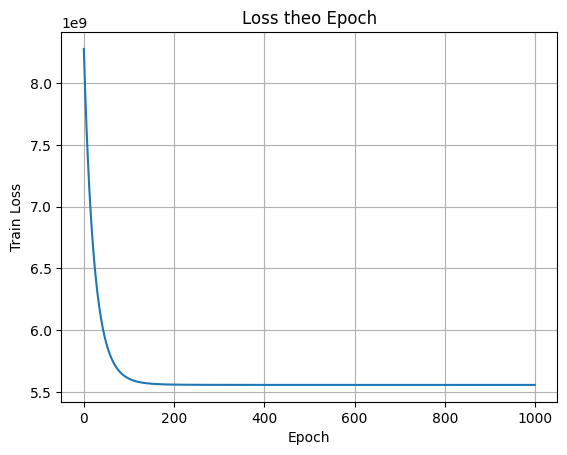

In [34]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Loss theo Epoch')
plt.grid(True)
plt.show()

In [35]:
def predict(x, w):
    return w.dot(np.append(x, 1))

# Dự đoán y_pred trên tập test
y_pred = [predict(x_i, w) for x_i in X_test_scaled]

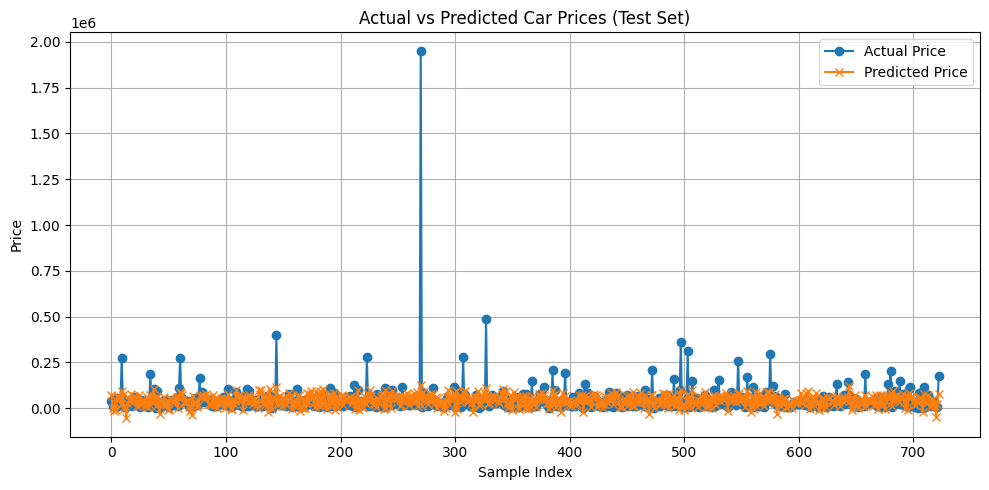

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(y_pred, label='Predicted Price', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Car Prices (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()